<h1>Central Limit Theorem</h1>


<i>Suppose we want to study the average age of the whole population of India. As the popullation of Indis is very high, it will be a tedious job to get everyone's age data and will take lot of time for the survey. So instead of doing that we can collect samples from different parts of India and try to make an inference. To work with samples we need an approximation theory which can simplify the process of calculating mean age. Here the Central Limit Theorem comes into the picture. It is based on such approximation and has a huge significance in the field of statistics. It uses sampling distribution to generalize the samples and use to calculate approx mean, standard daviation and other important parameters.</i>

<h3>What is Central Limit Theorem?</h3>

    CLT states that if you have a population with mean μ, sd σ, and take sufficiently large random samples from the 
    population with replacement, then the distribution of the sample means will be normally distributed approximately.
    
    This will hold true regardless of whether the source population is normal or skewed, provided the sample size is 
    sufficiently large (usually n > 30). If the population is normally distributed, then the theorem holds true even
    for samples smaller than 30.
    
    Note: CLT will be valid, when the samples are reasonably large. If the dataset has less amount of datapoints, then the
    samples has to be small which is not an ideal case to justify CLT. 
    
<h3>What is Sampling Distribution?</h3>

    The plot of independently taken samples from a large dataset having mean μ and sd σ is called a sampling distribution. 
    Basically, it's a distribution plot of the samples with the associated parameters.

<h3>Formulation of CLT:</h3>

    For a population(n) if "x" has finite mean μ and sd σ, CLT is defined by,
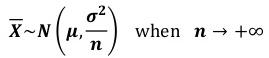

    where the sample mean and variance is,
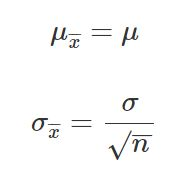

    So the average of the sample means will be approximate to the population mean(μ)  and the sd(σ) will be the average of 
    sd(σ) of samples divided by root over of total samples as shown above.
    
    The sample sd(σ) is calculated differently from the original sd(σ) in the above statement. This is called standard 
    error.

<h3>What is standard error?</h3>

    The standard error(SE) of a statistic is the standard deviation of it's sampling distribution or an estimate of that
    standard deviation. The sampling distribution of a population mean is generated by repeated sampling and recording of
    the means obtained. This forms a distribution of different means, and this distribution has its own mean and sd. 
    
    Mathematically, the variance of the sampling distribution obtained is equal to the variance of the population divided
    by the sample size. This is because as the sample size increases, sample means cluster more closely around the 
    population mean. Therefore, the relationship between the standard error of the mean and the standard deviation is,
    
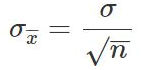

In [1]:
import warnings
warnings.filterwarnings("ignore")

import random
import sidetable
import prettytable
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pt

<b><i>Here I have taken the Black Friday sales dataset for the analysis of CLT. The dataset consists of 5,50,068 data points.</i></b>

In [2]:
#importing data
df = pd.read_csv(r"\BlackFriday\train.csv")
print("Shape: ",df.shape)
df.head(2)

Shape:  (550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [4]:
#mean of the popullation
mean_pop = df["Purchase"].mean()
std_pop = df["Purchase"].std()
print("μ and σ of overall purchases are {} and {} units respectively.".format(round(mean_pop,2),round(std_pop,2)))

μ and σ of overall purchases are 9263.97 and 5023.07 units respectively.


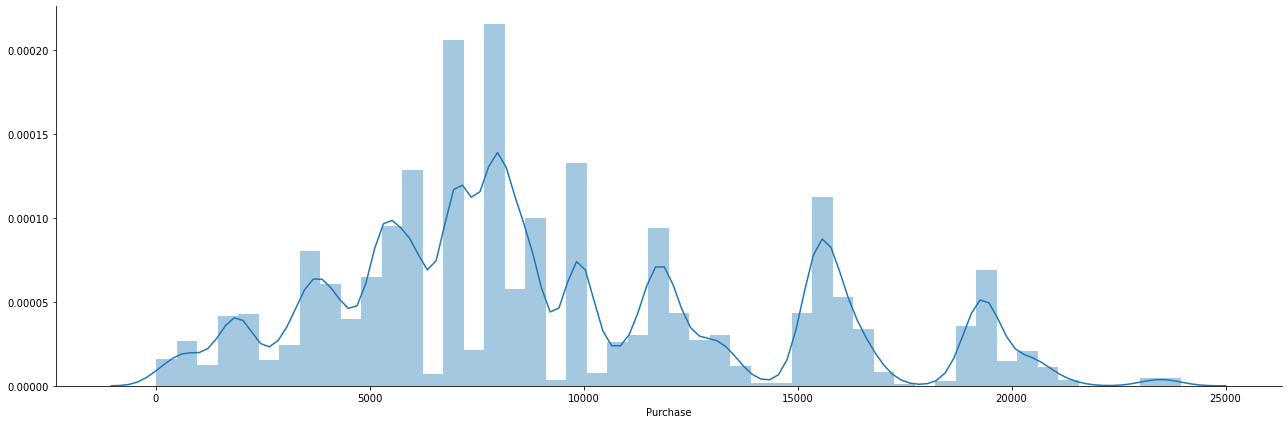

In [8]:
#distribution plot of overall purchase
sns.FacetGrid(df,height=6,aspect=3).map(sns.distplot,"Purchase")
pt.show()

<b><i>As we can see, the overall distribution is asymetric. Now we have to take more than 30 samples and plot the mean distribution to check whether it follows normal distribution or not.</i></b>

<h3>Assumptions for Samples:</h3>

    1. The sample data should be sampled randomly. 
    2. It should be independent of each other. There shouldn't be any similarity between them.
    3. The overall sample size shouldn't exceed more than 10% of the whole datset.
    4. The sample size should be sufficiently large(n > 30) when the original dataset is skewed or asymmetric. 

<h3>Mean Distribution plots:</h3>

    As we can see the more number of samples result in the higher probability of the mean distributions being normally
    distributed. Let's calculate the mean μ and sd σ of each distribution and check how much it is closer to the μ and σ 
    of the overall purchase data.

In [9]:
#function to get sample mean
def sample_mean_distribution(data, samples_count, data_points_count):
    #list to append all samples
    samples_list = list()
    #data in array
    data = np.array(data.values)
    for i in range(0, samples_count):
        samples = random.sample(range(0, data.shape[0]), data_points_count)
        samples_list.append(data[samples].mean())
    #return array of sample mean
    return np.array(samples_list)

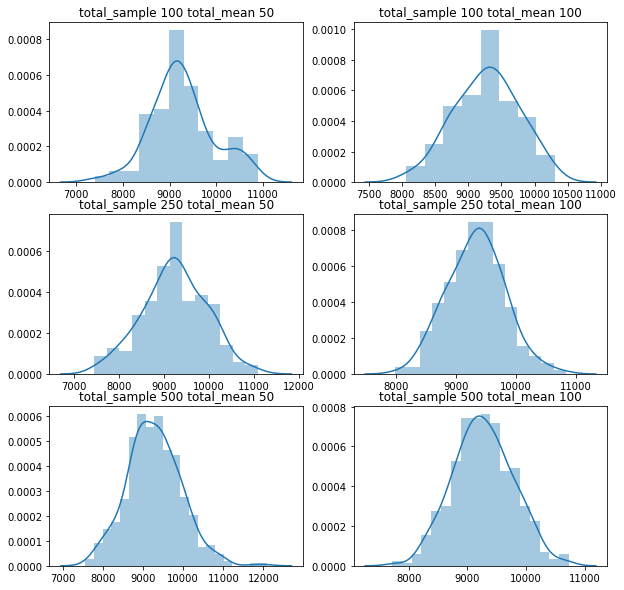

In [14]:
cnt = 0
sample_mean = list()
#setting figures
fg, ax = pt.subplots(nrows=3, ncols=2, figsize=(10, 10))
#list of samples and datapoints combinations
lst = [(100,50),(100,100),(250,50),(250,100),(500,50),(500,100)]
for i in range(0,3):
    for j in range(0,2):
        ax[i,j].set_title("total_sample " + str(lst[cnt][0]) + " total_mean " + str(lst[cnt][1]))
        sns.distplot(sample_mean_distribution(df["Purchase"], lst[cnt][0],lst[cnt][1]),ax = ax[i,j])
        sample_mean.append(sample_mean_distribution(df["Purchase"], lst[cnt][0],lst[cnt][1]))
        cnt +=1

<b><i>As we can see the more number of samples result in the higher probability of the mean distributions being normally distributed. 
Let's calculate the mean μ and sd σ of each distribution and check how much it is closer to the μ and σ of the overall purchase data.</i></b>

In [82]:
#calculating output
def sample_output(data, population_mean, population_sd,total_sample_points_list):
    df = pd.DataFrame()
    mean_sample = list(); std_sample = list(); std_approx = list(); strings_list = list()
    pop_mean = list(); pop_std = list()
    #calculating sample values
    for idx, val in enumerate(data):
        pop_mean.append(round(population_mean,2))
        pop_std.append(round(population_sd,2))
        mean_sample.append(round(val.mean(),2))
        std_sample.append(round(val.std(),2))
        std_approx.append(round(population_sd/np.sqrt((total_sample_points_list[idx][1])),2))
        strings_list.append("total_sample_" + str(total_sample_points_list[idx][0]) + "_total_mean_"
                            + str(total_sample_points_list[idx][1]))
    df["name"] = pd.Series(strings_list); df["purchase_mean"] = pd.Series(pop_mean)
    df["sample_mean"] = pd.Series(mean_sample); df["purchase_std"] = pd.Series(pop_std)
    df["sample_std"] = pd.Series(std_sample); df["approx_std"] = pd.Series(std_approx)
    
    return df

In [83]:
output_df = sample_output(sample_mean, mean_pop, std_pop,lst)
output_df

,name,purchase_mean,sample_mean,purchase_std,sample_std,approx_std
0,total_sample_100_total_mean_50,9263.97,9384.20,5023.07,755.39,710.37
1,total_sample_100_total_mean_100,9263.97,9273.71,5023.07,524.89,502.31
2,total_sample_250_total_mean_50,9263.97,9232.49,5023.07,760.25,710.37
3,total_sample_250_total_mean_100,9263.97,9261.34,5023.07,494.77,502.31
4,total_sample_500_total_mean_50,9263.97,9249.83,5023.07,704.29,710.37
5,total_sample_500_total_mean_100,9263.97,9262.26,5023.07,492.14,502.31


In [84]:
ptable = prettytable.PrettyTable(["sample_mean"+u"\u2248"+"orig_mean", "sample_std"+u"\u2248"+"approx_std"])
for i in range(0, len(output_df)):
    row = list()
    row.append(str(output_df["sample_mean"][i])+u"\u2248"+str(output_df["purchase_mean"][i]))
    row.append(str(output_df["sample_std"][i])+u"\u2248"+str(output_df["approx_std"][i]))
    ptable.add_row(row)
print(ptable)

+-----------------------+-----------------------+
| sample_mean≈orig_mean | sample_std≈approx_std |
+-----------------------+-----------------------+
|     9384.2≈9263.97    |     755.39≈710.37     |
|    9273.71≈9263.97    |     524.89≈502.31     |
|    9232.49≈9263.97    |     760.25≈710.37     |
|    9261.34≈9263.97    |     494.77≈502.31     |
|    9249.83≈9263.97    |     704.29≈710.37     |
|    9262.26≈9263.97    |     492.14≈502.31     |
+-----------------------+-----------------------+


<b><i>As the number of samples increases, the sample mean and sd becomes closer to the original mean and sd. So our approach and observations using CLT are valid.</i></b>

<h2>Machine Learning Aspect:</h2>
<h3>How CLT helps in generalizing large datasets?</h3>

    Machine Learning models generally treat training data as a mix of deterministic and random parts. Let the dependent
    variable(Y) consists of these parts. Models always want to express the dependent variables(Y) as some function of 
    several independent variables(X). If the function is sum (or expressed as a sum of some other function) and the number
    of X is high, then Y should have a normal distribution.
    
    Here ml models try to express the deterministic part as a sum of deterministic independent variables(X):
    
    deterministic + random = func(deterministic(1)) +…+ func(deterministic(n)) + model_error

    If the whole deterministic part of Y is explained by X then the model_error depicts only the random part and thus 
    should have a normal distribution(according to CLT).
    
    So if the error distribution is normal, then we may suggest that the model is successful and we can apply linear 
    algorithms to the dataset for better results. Else some features are absent in the model but have a large enough 
    influence on Y or the model is incorrect.
    
<h3>Statistical Inference:</h3>

    Making statistical inferences about a given data is what a Data Scientist or ML engineer does every day. This 
    theorem gives us the ability to quantify the likelihood that our sample will deviate from the population without 
    having to take any new sample to compare it with. We don't need the characteristics of the whole population to 
    understand the likelihood of our sample being representative of it.

    So this means if we don't know about the actual population mean(μ), then we can infer the sample mean as our actual 
    mean(μ). In the above case, if we take 500 samples with 100 data points each then 9262.26 units can be considered as 
    the originally purchased mean. 
    
    No…

    Though the sample mean is almost the same as the original mean(μ), but a single number estimate by itself(500 samples 
    with 100 data points) provides no information about the precision and reliability of the estimate concerning the 
    larger population.

<b><i>Q. Then how can we decide the population mean, or in ML terms when we have a final trained model, how can we make an inference about how skillful the model is expected to be in practice?</i></b>

<b><i>Ans: The presentation of this uncertainty is called a confidence interval.</i></b>

<h2>What is Confidence Interval?</h2>

    In statistics, a confidence interval refers to the probability that a population parameter will fall between a set 
    of values for a certain proportion of times. Confidence intervals measure the degree of uncertainty or certainty in 
    a sampling method. They can take any number of probability limits, with the most common being a 95% or 99% confidence 
    level.

    The confidence interval tells us how confident we are in our results. With any survey or experiment, we're never 100%
    sure that our results could be repeated. If we're 95% sure, or 99% sure, that's usually considered "good enough" in
    statistics. That percentage of sureness is the confidence interval.

    For example, we survey a group of pet owners to see how many cans of dog food they purchase a year. We test our 
    statistics at the 99 percent confidence level and get a confidence interval of (200,300). That means they buy between
    200 and 300 cans a year. We're super confident (99% is a very high level!) that our results are sound, statistically.
    
    This is helpful when we don't know anything about the large population parameter. Then we'll be uncertain about our 
    sample parameter as it doesn't depict any precision.

<h3>Z-Score:</h3>

    A z-score describes the position of a raw score in terms of its distance from the mean when measured in standard 
    deviation units. The z-score is positive if the value lies above the mean, and negative if it lies below the mean.
    
    It is useful to standardize the values (raw scores) of a normal distribution by converting them into z-scores because:
    1. it allows us to calculate the probability of a score occurring within a standard normal distribution
    2. and enables us to compare two scores that are from different samples (which may have different means and standard 
    deviations).

<h3>Calculation:</h3>

    Let 0<α<1, and let (100 * (1-α))% denote the confidence level.
    Suppose we have a standard normal distribution "Z". 
    
    (Z_α/2) denote a z-score with α/2 probability to its right.
    Similarly, let (-Z_α/2) denote a z-score with α/2 probability to its left.
    
    Let α= 0.1, then (Z_α/2) = 1.645 to it's right and (Z_α/2) = -1.645 to it's left.
    
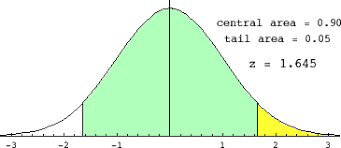

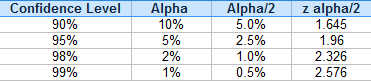

<h3>95% confidence level with known standard deviation:</h3>

    To calculate the limit for a 95 percent confidence level the formula will be,
    
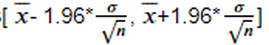

where x_bar = sample mean,
σ = population standard deviation, 
n = number of samples


    upper 95% limit = x_bar(sample mean) + SE(standard error=σ/sqrt(n)) * ((Z_0.05/2)=1.96)
    lower 95% limit = x_bar(sample mean) - SE(standard error=σ/sqrt(n)) * ((Z_0.05/2)=1.96)

In [85]:
"""getting lower and upper limit of 95% confidence interval with known standard deviation of population"""
lower_lim = list(); upper_lim = list()
for i in range(0,len(output_df)):
    lower_limit = output_df["sample_mean"][i] - ((output_df["approx_std"][i])*1.96); lower_lim.append(round(lower_limit,2))
    upper_limit = output_df["sample_mean"][i] + ((output_df["approx_std"][i])*1.96); upper_lim.append(round(upper_limit,2))

#appending values into the dataset    
output_df["lower_limit"] = pd.Series(lower_lim)
output_df["upper_limit"] = pd.Series(upper_lim)

In [86]:
output_df

,name,purchase_mean,sample_mean,purchase_std,sample_std,approx_std,lower_limit,upper_limit
0,total_sample_100_total_mean_50,9263.97,9384.20,5023.07,755.39,710.37,7991.87,10776.53
1,total_sample_100_total_mean_100,9263.97,9273.71,5023.07,524.89,502.31,8289.18,10258.24
2,total_sample_250_total_mean_50,9263.97,9232.49,5023.07,760.25,710.37,7840.16,10624.82
3,total_sample_250_total_mean_100,9263.97,9261.34,5023.07,494.77,502.31,8276.81,10245.87
4,total_sample_500_total_mean_50,9263.97,9249.83,5023.07,704.29,710.37,7857.50,10642.16
5,total_sample_500_total_mean_100,9263.97,9262.26,5023.07,492.14,502.31,8277.73,10246.79


    For each experiment, we can see the calculated mean falls between the lower and upper limit. From this, we can infer 
    that the purchase mean(μ) parameter for the whole dataset lies between 8277.73 and 10246.79, and we are 95% confident 
    about this.

<h3>95% confidence level without standard deviation:</h3>

    To calculate the limit for a 95 percent confidence level without sd the formula will be,
    
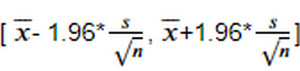

where x_bar = sample mean,
s = sample standard deviation, 
n = number of samples

    upper 95% limit = x_bar(sample mean) + SE(standard error=s/sqrt(n)) * ((Z_0.05/2)=1.96)
    lower 95% limit = x_bar(sample mean) - SE(standard error=s/sqrt(n)) * ((Z_0.05/2)=1.96)

In [96]:
"""getting lower and upper limit of 95% confidence interval without standard deviation of population"""
lower_lim = list(); upper_lim = list()
for i in range(0,len(output_df)):
    lower_limit = output_df["sample_mean"][i] - ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*1.96); lower_lim.append(round(lower_limit,2))
    upper_limit = output_df["sample_mean"][i] + ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*1.96); upper_lim.append(round(upper_limit,2))
#appending values into the dataset    
output_df["lower_limit_wt_sd"] = pd.Series(lower_lim)
output_df["upper_limit_wt_sd"] = pd.Series(upper_lim)

In [99]:
output_df

,name,purchase_mean,sample_mean,purchase_std,sample_std,approx_std,lower_limit,upper_limit,lower_limit_wt_sd,upper_limit_wt_sd
0,total_sample_100_total_mean_50,9263.97,9384.20,5023.07,755.39,710.37,7991.87,10776.53,9174.82,9593.58
1,total_sample_100_total_mean_100,9263.97,9273.71,5023.07,524.89,502.31,8289.18,10258.24,9170.83,9376.59
2,total_sample_250_total_mean_50,9263.97,9232.49,5023.07,760.25,710.37,7840.16,10624.82,9021.76,9443.22
3,total_sample_250_total_mean_100,9263.97,9261.34,5023.07,494.77,502.31,8276.81,10245.87,9164.37,9358.31
4,total_sample_500_total_mean_50,9263.97,9249.83,5023.07,704.29,710.37,7857.50,10642.16,9054.61,9445.05
5,total_sample_500_total_mean_100,9263.97,9262.26,5023.07,492.14,502.31,8277.73,10246.79,9165.80,9358.72


    Here also we can clearly see that the calculated mean falls under the lower and upper boundary for each experiment. 
    Though the margin is very small now, we can say that we are 95% confident about this.

<h3>99% confidence level without standard deviation:</h3>

    To calculate the limit for a 99 percent confidence level without sd the formula will be,
    
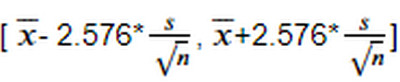

where x_bar = sample mean,
s = sample standard deviation, 
n = number of samples

    upper 99% limit = x_bar(sample mean) + SE(standard error=s/sqrt(n)) * ((Z_0.01/2)=2.576)
    lower 99% limit = x_bar(sample mean) - SE(standard error=s/sqrt(n)) * ((Z_0.01/2)=2.576)

In [103]:
"""getting lower and upper limit of 95% confidence interval without standard deviation of population"""
lower_lim = list(); upper_lim = list()
for i in range(0,len(output_df)):
    lower_limit = output_df["sample_mean"][i] - ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*2.576)
    lower_lim.append(round(lower_limit,2))
    upper_limit = output_df["sample_mean"][i] + ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*2.576)
    upper_lim.append(round(upper_limit,2))
#appending values into the dataset    
output_df["lower_limit_99"] = pd.Series(lower_lim)
output_df["upper_limit_99"] = pd.Series(upper_lim)

In [104]:
output_df

,name,purchase_mean,sample_mean,purchase_std,sample_std,approx_std,lower_limit,upper_limit,lower_limit_wt_sd,upper_limit_wt_sd,lower_limit_99,upper_limit_99
0,total_sample_100_total_mean_50,9263.97,9384.20,5023.07,755.39,710.37,7991.87,10776.53,9174.82,9593.58,9109.01,9659.39
1,total_sample_100_total_mean_100,9263.97,9273.71,5023.07,524.89,502.31,8289.18,10258.24,9170.83,9376.59,9138.50,9408.92
2,total_sample_250_total_mean_50,9263.97,9232.49,5023.07,760.25,710.37,7840.16,10624.82,9021.76,9443.22,8955.53,9509.45
3,total_sample_250_total_mean_100,9263.97,9261.34,5023.07,494.77,502.31,8276.81,10245.87,9164.37,9358.31,9133.89,9388.79
4,total_sample_500_total_mean_50,9263.97,9249.83,5023.07,704.29,710.37,7857.50,10642.16,9054.61,9445.05,8993.26,9506.40
5,total_sample_500_total_mean_100,9263.97,9262.26,5023.07,492.14,502.31,8277.73,10246.79,9165.80,9358.72,9135.48,9389.04


<h2>Reference</h2>

https://www.investopedia.com/terms/c/central_limit_theorem.asp

https://en.wikipedia.org/wiki/Sampling_distribution

https://en.wikipedia.org/wiki/Standard_error

https://www.kdnuggets.com/2016/08/central-limit-theorem-data-science.html

https://machinelearningmastery.com/a-gentle-introduction-to-the-central-limit-theorem-for-machine-learning/#:~:text=The%20central%20limit%20theorem%20has,solved%20using%20numerical%20optimization%20methods.

https://www.statisticshowto.com/probability-and-statistics/z-score/